### **Desafío - Gráficos**

##### **`Importar librerias y carga de archivo`**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from calidad_datos import calidad_datos
plt.style.use('seaborn-whitegrid') # Graficos estilo seaborn
plt.rcParams["figure.figsize"] = (10,6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # Resolución gráficos

In [24]:
import os
os.listdir()

['01_Desafio_guiado_-_Graficos.ipynb',
 '02_Desafío_evaluado_-_Estimando_curvas_de_densidad_de_probabilidad.pdf',
 'calidad_datos.py',
 'qog_std_cs_jan18.csv']

In [2]:
df = pd.read_csv('qog_std_cs_jan18.csv')
df.shape

(194, 1882)

#### **`Desafío 1 : Genere una submuestra de casos`**

##### **Ejercicio**

- Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.
- Seleccione el 50% de los casos.
- Cada base generada debe contener los siguientes elementos:
  - El nombre del país (`cname`).
  - El índice de desarrollo humano (`​undp_hdi​`).
  - El código del país (`ccodealp`).  
  - La región a la que pertenece (`​ht_region​`).
  - El PIB per capita. (`​gle_cgdpc​`).
  - El total de la población (`​imf_pop​`).

- Si su apellido está entre la A y la M, escoja las siguientes variables del módulo Educación:
    - `ffp_hf`: Human Flight and Brain Drain.
    - `wef_qes`: Quality of the educational system.
    - `wdi_expedu`: Government expenditure on education, total (% of GDP)
    - `wdi_ners`: School enrollment, secondary (% net)

- Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo Salud:
    - `wef_imort​`: Infant mortality, deaths/1000 live births.
    - `who_alc2000​`: Alcohol consumption per capita (2000-).
    - `who_tobt​`: Current smoking of any tobacco product (Total).
    - `wdi_exph​`: Government expenditure on health, total (% of GDP).

- Guarde esta tabla procesada en un nuevo objeto.
- Renombre las categorías de la variable `​ht_region​` de números a regiones.    

In [3]:
# Con 'random_state' indico una semilla
# Selecciono solo el 50% de los datos aleatoriamente
df_frac = df.sample(frac=0.5, random_state=4796)
codigos = [1,2,3,4,5,6,7,8,9,10]
nombres = ['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian', 'WesternDem', 'EastAsia','SouthEastAsia','SouthAsia','Pacific', 'Caribbean']
df_frac['ht_region'] = df_frac['ht_region'].replace(codigos, nombres)
columnas_am = ['cname','undp_hdi','ccodealp','ht_region','gle_cgdpc','imf_pop', 'ffp_hf', 'wef_qes', 'wdi_expedu', 'wdi_ners']
columnas_nz = ['cname','undp_hdi','ccodealp','ht_region','gle_cgdpc','imf_pop', 'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']
df_frac = df_frac.loc[:, columnas_nz]

In [21]:
df_frac.shape

(97, 10)

In [22]:
df_frac.head()

,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
37,Taiwan,NaN,TWN,EastAsia,33965.8710,23.434,3.934564,NaN,NaN,NaN
27,Belarus,0.798,BLR,EastEurope,17780.6410,9.468,NaN,13.94,27.900000,5.687722
114,Montenegro,0.804,MNE,EastEurope,14538.5200,0.622,5.500000,6.56,NaN,6.416543
112,Mongolia,0.733,MNG,EastAsia,6277.8999,2.882,23.000000,NaN,26.799999,4.730342
59,France (1963-),0.894,FRA,WesternDem,34007.8980,64.028,3.400000,11.50,28.100000,11.539519


#### **`Desafio 2 : Reportar estadisticas para:` gle_cgdpc, undp_hdi, imf_pop**

In [32]:
calidad_datos(df_frac).loc[['gle_cgdpc', 'undp_hdi', 'imf_pop']]

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,limit_inf,limit_sup,outliers
gle_cgdpc,float64,0,0.000000,0,0.0,97.0,NaN,NaN,NaN,16770.674404,21730.728743,488.26999,2658.51,9227.1504,23847.08,108481.13,-15825.41871,49366.767519,6
undp_hdi,float64,5,0.051546,0,0.0,92.0,NaN,NaN,NaN,0.700891,0.166644,0.347,0.55725,0.7355,0.836,0.948,0.450926,0.950857,10
imf_pop,float64,22,0.226804,0,0.0,75.0,NaN,NaN,NaN,35.73824,55.627329,0.018,3.984,10.927,44.094002,318.789001,-47.702753,119.179233,6


In [33]:
calidad_datos(df_frac).loc[['gle_cgdpc', 'undp_hdi', 'imf_pop']].dropna(axis=1)

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,mean,std,min,25%,50%,75%,max,limit_inf,limit_sup,outliers
gle_cgdpc,float64,0,0.000000,0,0.0,97.0,16770.674404,21730.728743,488.26999,2658.51,9227.1504,23847.08,108481.13,-15825.41871,49366.767519,6
undp_hdi,float64,5,0.051546,0,0.0,92.0,0.700891,0.166644,0.347,0.55725,0.7355,0.836,0.948,0.450926,0.950857,10
imf_pop,float64,22,0.226804,0,0.0,75.0,35.73824,55.627329,0.018,3.984,10.927,44.094002,318.789001,-47.702753,119.179233,6


Otra forma de ver los estadisticos:

In [34]:
def funcion_a(dataframe):
  return dataframe.describe()

funcion_a(df_frac)

,undp_hdi,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
count,92.000000,97.000000,75.000000,76.000000,90.000000,67.000000,94.000000
mean,0.700891,16770.674404,35.738240,25.382034,5.143333,23.282089,6.943169
std,0.166644,21730.728743,55.627329,26.126995,3.951100,9.476461,2.967103
min,0.347000,488.269990,0.018000,1.700000,0.010000,4.700000,1.865546
25%,0.557250,2658.510000,3.984000,4.700000,1.442500,16.850001,4.965397
50%,0.735500,9227.150400,10.927000,14.650000,4.580000,23.200001,6.405126
75%,0.836000,23847.080000,44.094002,42.174999,8.322500,29.200000,8.980941
max,0.948000,108481.130000,318.789001,117.400002,13.940000,54.000000,17.140755


In [37]:
def funcion_a(dataframe):
  return dataframe.describe()

funcion_a(df_frac[['gle_cgdpc', 'undp_hdi', 'imf_pop']])

,gle_cgdpc,undp_hdi,imf_pop
count,97.000000,92.000000,75.000000
mean,16770.674404,0.700891,35.738240
std,21730.728743,0.166644,55.627329
min,488.269990,0.347000,0.018000
25%,2658.510000,0.557250,3.984000
50%,9227.150400,0.735500,10.927000
75%,23847.080000,0.836000,44.094002
max,108481.130000,0.948000,318.789001


In [41]:
def get_descriptives(df, columnas):
    for colname, serie in df.iteritems():
        if colname in columnas:
            print(colname)
            print(serie.describe())
            print('-'*100)
columnas = ['gle_cgdpc', 'undp_hdi', 'imf_pop']    

get_descriptives(df_frac, 'undp_hdi')

undp_hdi
count    92.000000
mean      0.700891
std       0.166644
min       0.347000
25%       0.557250
50%       0.735500
75%       0.836000
max       0.948000
Name: undp_hdi, dtype: float64
----------------------------------------------------------------------------------------------------


#### **`Desafio 3 : Reportar los valores perdidos de una variable`**

- La función debe contener los siguientes argumentos:
    - `dataframe`: La función debe ingresar un objeto Dataframe
    - `var`: Variable para inspeccionar
    - `print_list`: Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser False por defecto
    - La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente
    - Cuando `print_list = True`, debe retornar la lista de casos

- Analice todas las variables y sus casos perdidos

In [67]:
df_frac.undp_hdi.isnull().value_counts()

False    92
True      5
Name: undp_hdi, dtype: int64

Una forma rápida de ver los datos nulos

In [64]:
calidad_datos(df_frac).loc[:,['nulos','porc_nulos']].sort_values('porc_nulos', ascending=False)

,nulos,porc_nulos
who_tobt,30,0.309278
imf_pop,22,0.226804
wef_imort,21,0.216495
who_alc2000,7,0.072165
undp_hdi,5,0.051546
wdi_exph,3,0.030928
gle_cgdpc,0,0.000000
cname,0,0.000000
ccodealp,0,0.000000
ht_region,0,0.000000


In [75]:
def get_null_cases(df, var, print_list=False):
    tmp = df.copy()
    tmp['flagnull'] = tmp[var].isnull()
    cont_na = 0
    for idx, row in tmp.iterrows():
        if row['flagnull'] == True:
            cont_na += 1
            if print_list == True:
                print(row['cname'])

    print('Casos nulos para {}: {}'.format(var, cont_na))
    print('Porcentaje nulos para {}: {}'.format(var, cont_na/df.shape[0]))

In [76]:
for c in df_frac.columns:
    print(c)
    get_null_cases(df_frac, c, print_list=False)
    print('-'*100)

cname
Casos nulos para cname: 0
Porcentaje nulos para cname: 0.0
----------------------------------------------------------------------------------------------------
undp_hdi
Casos nulos para undp_hdi: 5
Porcentaje nulos para undp_hdi: 0.05154639175257732
----------------------------------------------------------------------------------------------------
ccodealp
Casos nulos para ccodealp: 0
Porcentaje nulos para ccodealp: 0.0
----------------------------------------------------------------------------------------------------
ht_region
Casos nulos para ht_region: 0
Porcentaje nulos para ht_region: 0.0
----------------------------------------------------------------------------------------------------
gle_cgdpc
Casos nulos para gle_cgdpc: 0
Porcentaje nulos para gle_cgdpc: 0.0
----------------------------------------------------------------------------------------------------
imf_pop
Casos nulos para imf_pop: 22
Porcentaje nulos para imf_pop: 0.2268041237113402
-------------------------

In [77]:
for c in df_frac.columns:
    print(c)
    get_null_cases(df_frac, c, print_list=True)
    print('-'*100)

cname
Casos nulos para cname: 0
Porcentaje nulos para cname: 0.0
----------------------------------------------------------------------------------------------------
undp_hdi
Taiwan
Korea, North
San Marino
Monaco
Marshall Islands
Casos nulos para undp_hdi: 5
Porcentaje nulos para undp_hdi: 0.05154639175257732
----------------------------------------------------------------------------------------------------
ccodealp
Casos nulos para ccodealp: 0
Porcentaje nulos para ccodealp: 0.0
----------------------------------------------------------------------------------------------------
ht_region
Casos nulos para ht_region: 0
Porcentaje nulos para ht_region: 0.0
----------------------------------------------------------------------------------------------------
gle_cgdpc
Casos nulos para gle_cgdpc: 0
Porcentaje nulos para gle_cgdpc: 0.0
----------------------------------------------------------------------------------------------------
imf_pop
Korea, North
Liechtenstein
Cuba
Turkmenistan
Guin

#### **`Desafio 4 : Graficar Histogramas`**

- La función debe incluir los siguientes argumentos:
    - `sample_df`: La base de datos donde se encuentran los datos específicos.
    - `full_df`: La base de datos donde se encuentran todos los datos (contiene los datos de la muestra)
    - `var`: La variable a graficar.
    - `sample_mean​`: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral (sample_df). Por defecto debe ser **`False​`**.
    - `true_mean​`: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa (full_df).

- Implemente las funciones para las 4 variables seleccionadas según su grupo. ¿En que variables la media de la muestra es

In [89]:
df_frac

,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
37,Taiwan,NaN,TWN,EastAsia,33965.8710,23.434000,3.934564,NaN,NaN,NaN
27,Belarus,0.798,BLR,EastEurope,17780.6410,9.468000,NaN,13.94,27.900000,5.687722
114,Montenegro,0.804,MNE,EastEurope,14538.5200,0.622000,5.500000,6.56,NaN,6.416543
112,Mongolia,0.733,MNG,EastAsia,6277.8999,2.882000,23.000000,NaN,26.799999,4.730342
59,France (1963-),0.894,FRA,WesternDem,34007.8980,64.028000,3.400000,11.50,28.100000,11.539519
...,...,...,...,...,...,...,...,...,...,...
156,Slovakia,0.842,SVK,EastEurope,21776.3400,5.416000,6.300000,10.60,28.799999,8.054048
36,China,0.734,CHN,EastAsia,9283.3799,NaN,12.100000,5.78,25.900000,5.548228
157,Vietnam,0.678,VNM,SouthEastAsia,4147.5698,89.691002,18.400000,4.09,23.700001,7.066778
29,Cameroon,0.514,CMR,SubSaharian,2658.5100,NaN,61.099998,6.19,18.799999,4.103672


In [116]:
tmp = df_frac['wef_imort'].dropna()
np.mean(tmp)

25.382033790412702

In [119]:
tmp = df_frac['wef_imort']
np.mean(tmp)

25.382033790412702

In [134]:
def hist_plot(sample_df, full_df, var, sample_mean=False, true_mean=False):
    tmp = sample_df[var].dropna()
    plt.hist(tmp, color='grey', alpha=.5, bins=8)
    plt.title('Histograma {}'.format(var))
    if sample_mean:
        plt.axvline(np.mean(tmp), color='blue', label = "sample_mean")
    if true_mean:
        plt.axvline(np.mean(full_df[var]), color='red', label = "true_mean")    
    plt.legend()
    plt.ylabel("Frecuencia")
    plt.xlabel("bins")    

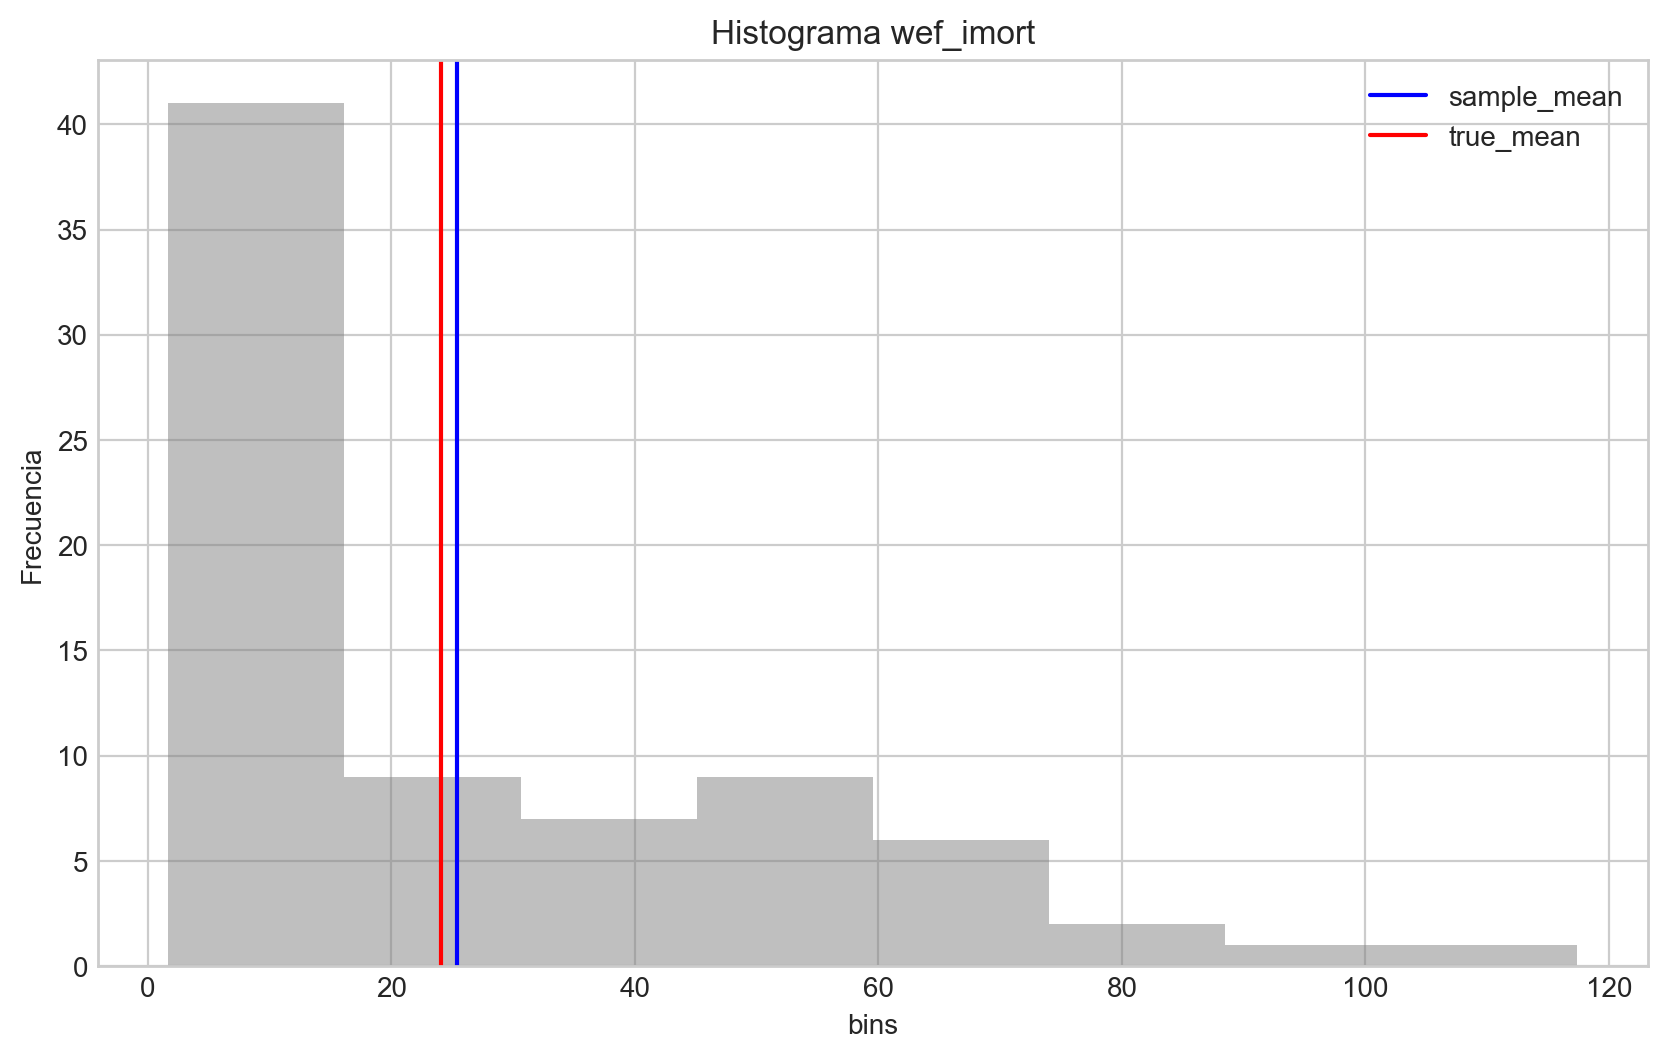

In [135]:
# Linea roja: media de la columna 'wef_imort' en 'df_frac'
# Linea azul: media de la columna 'wef_imort' en 'df'
hist_plot(df_frac, df, 'wef_imort', sample_mean=True, true_mean=True)

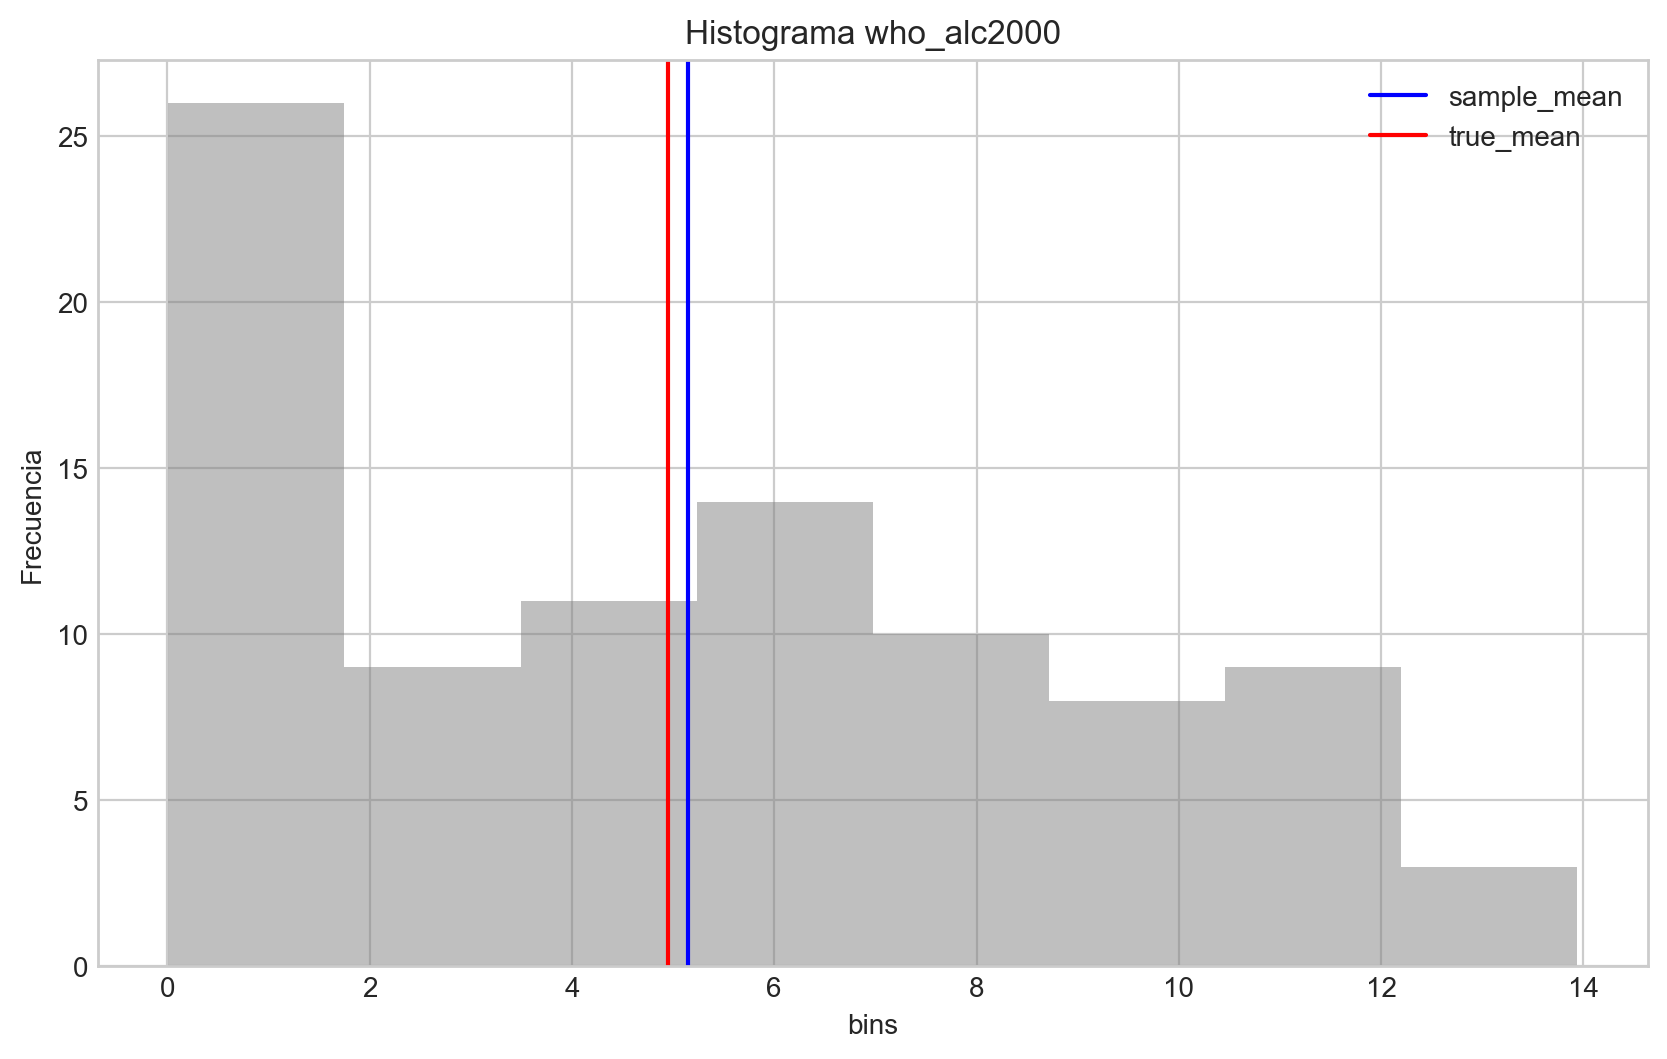

In [136]:
hist_plot(df_frac, df, 'who_alc2000', sample_mean=True, true_mean=True)

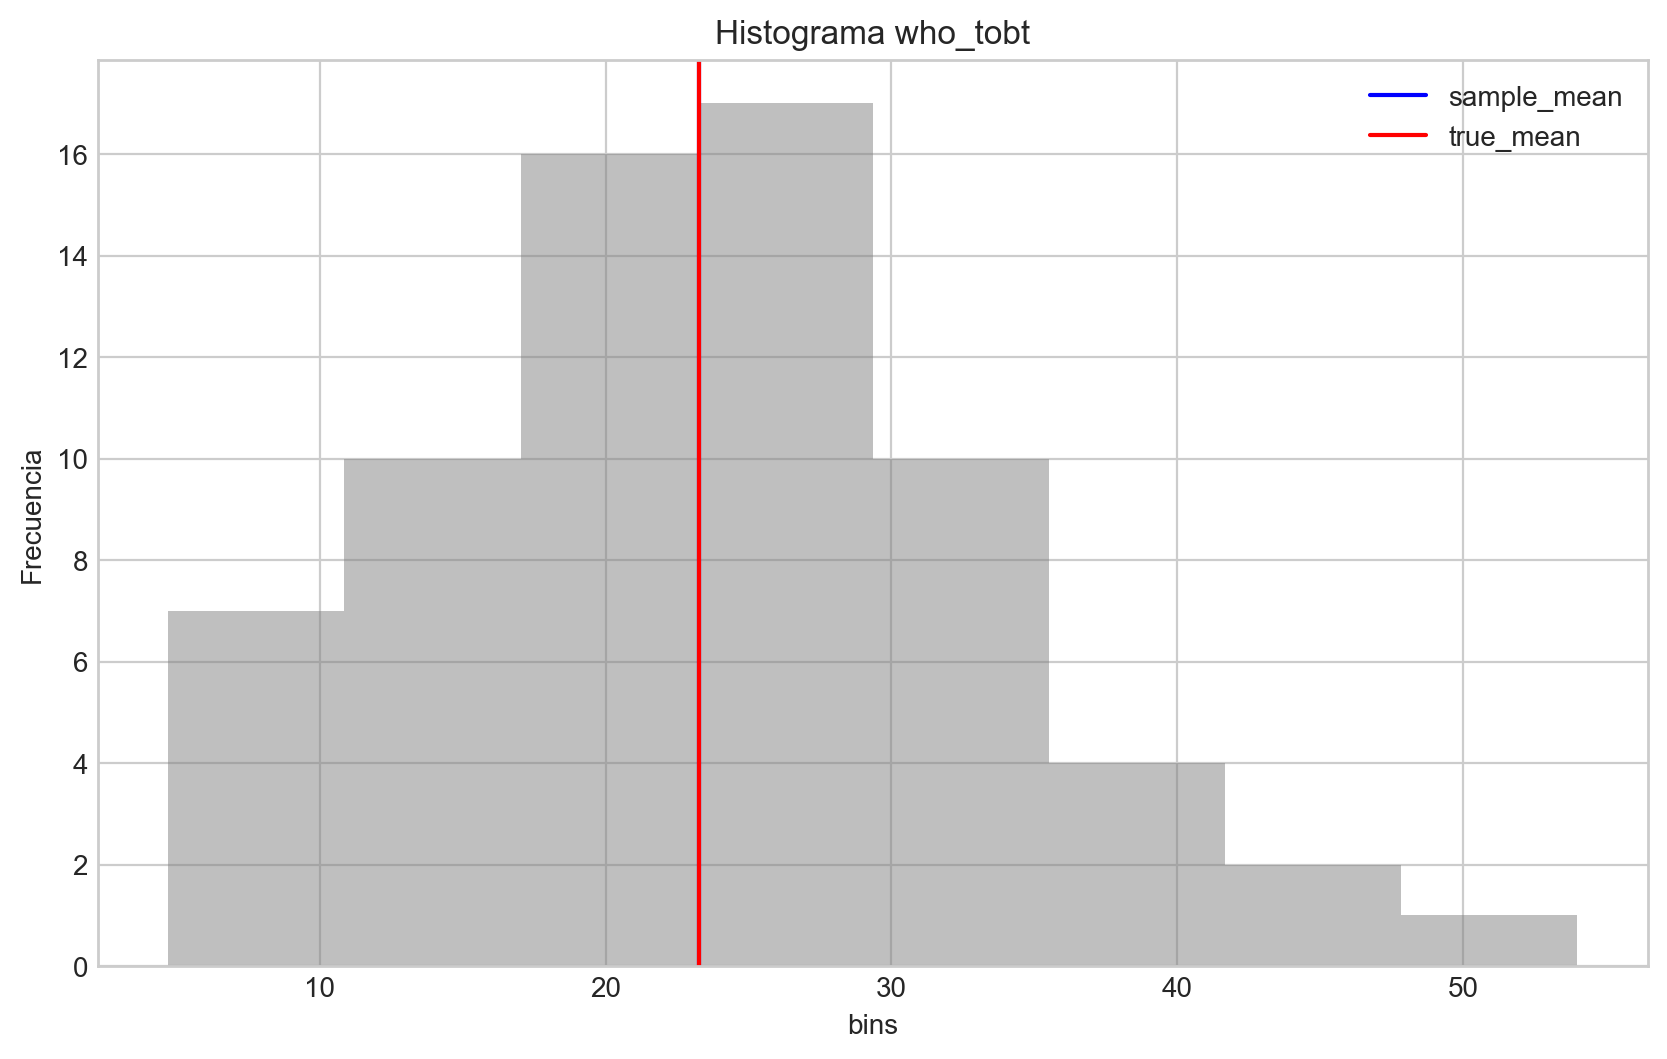

In [137]:
hist_plot(df_frac, df, 'who_tobt', sample_mean=True, true_mean=True)

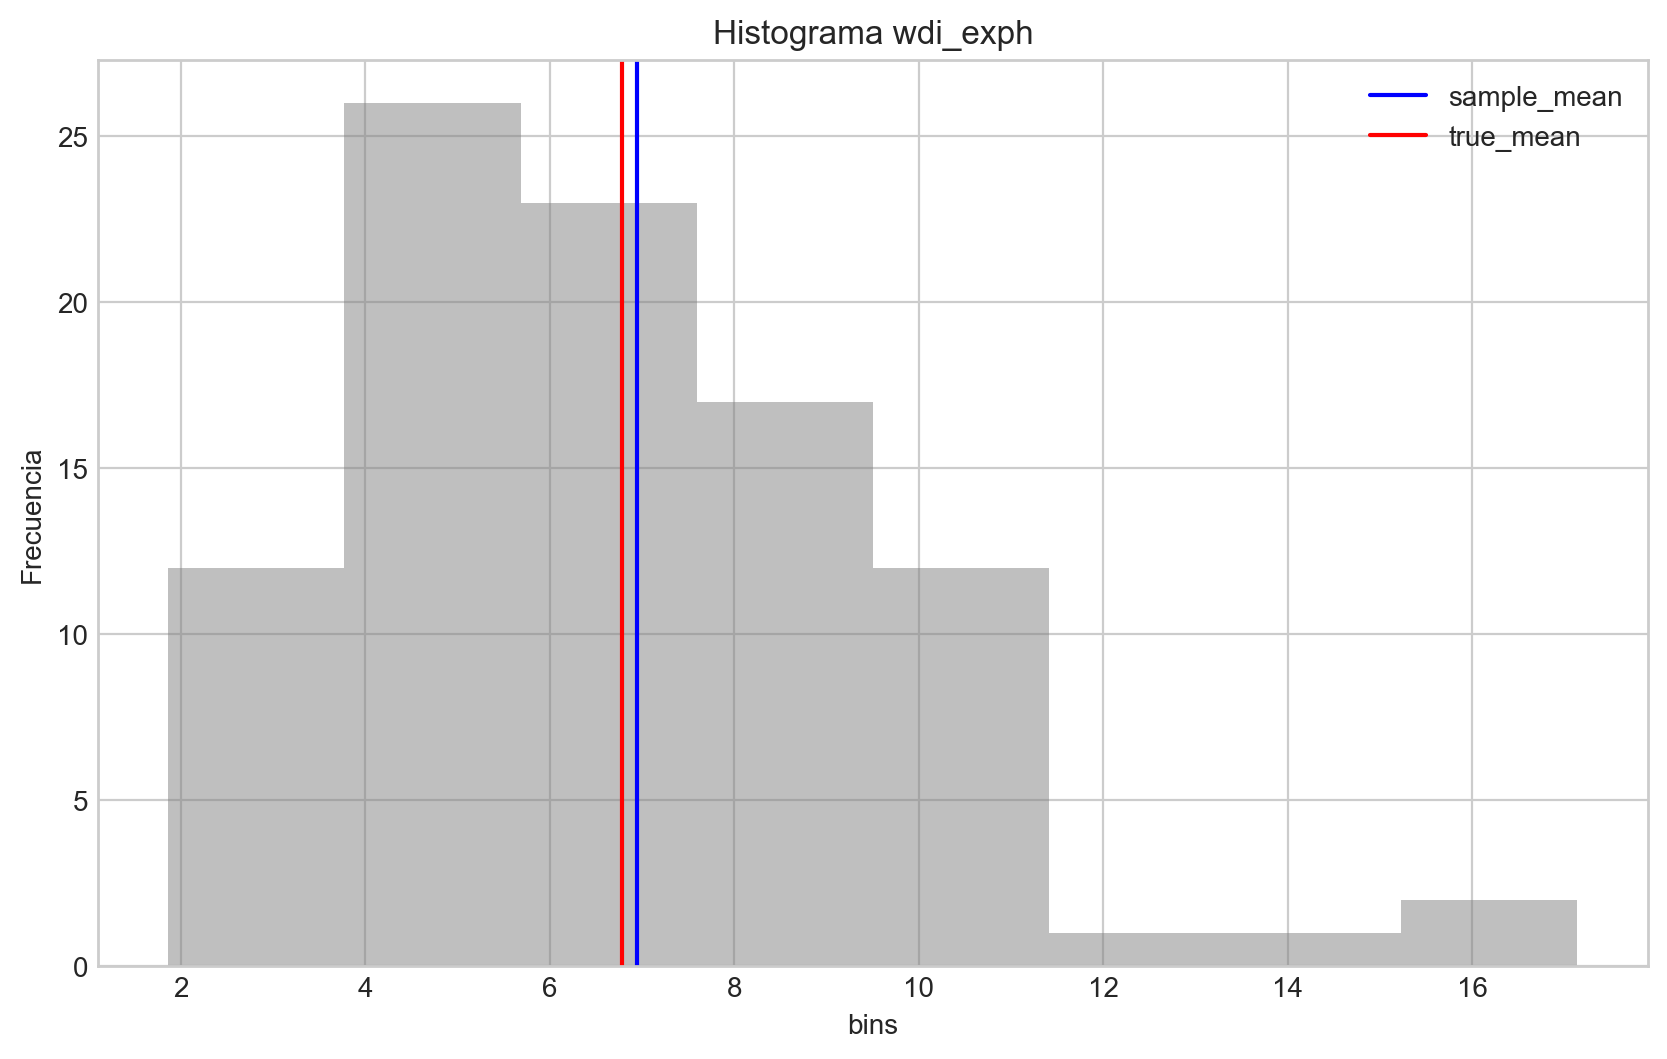

In [138]:
hist_plot(df_frac, df, 'wdi_exph', sample_mean=True, true_mean=True)

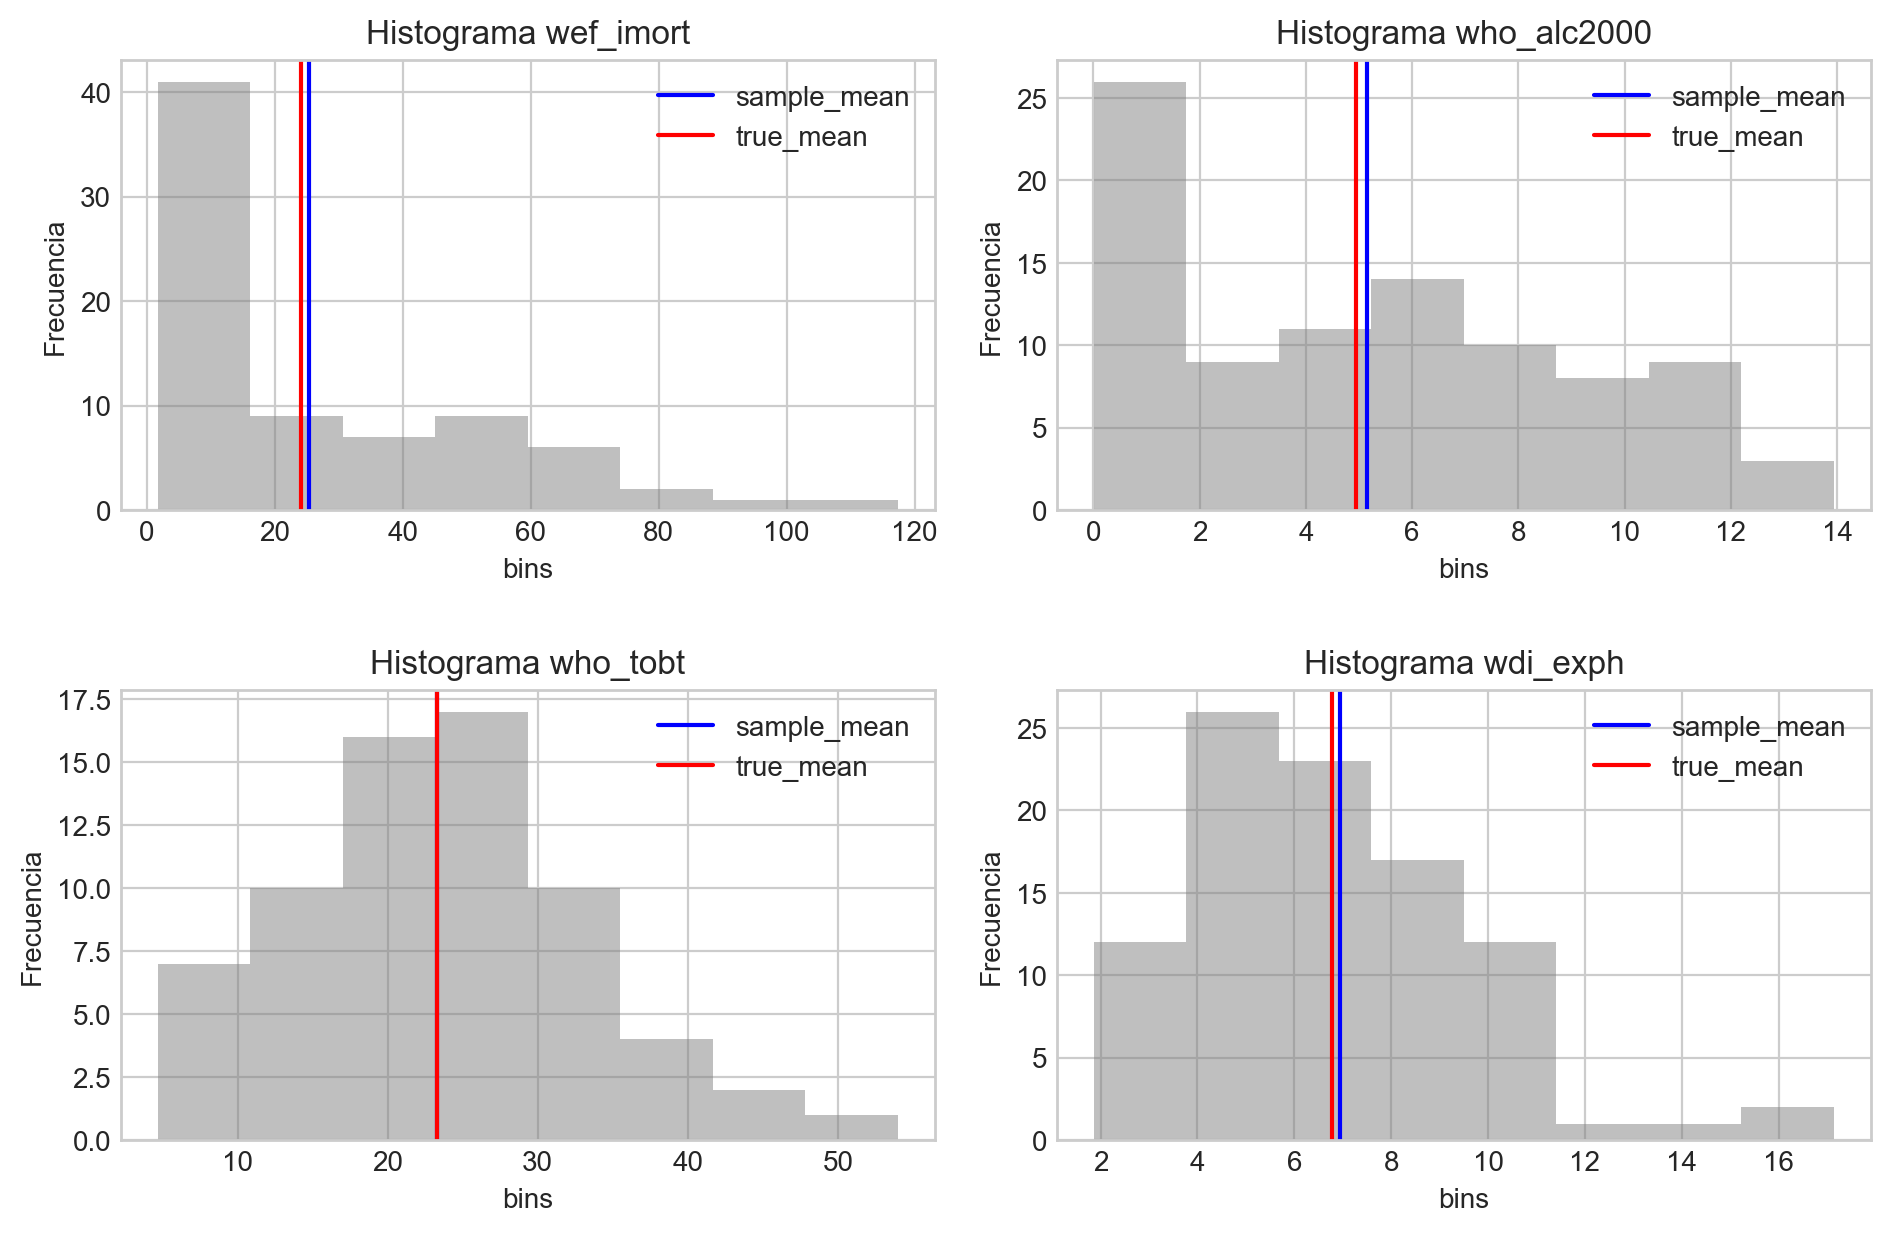

In [158]:
plt.subplots_adjust(left=0.125,
                    bottom=0.1, # El largo del grafico
                    right=1, # El ancho del grafico
                    top=1, # El largo del grafico
                    wspace= 0.15, # Espacio entre los graficos de la derecha y la izquierda
                    hspace=0.4) # Espacio entre los graficos de abajo y los de arriba

variables_solicitadas = ['wef_imort','who_alc2000','who_tobt','wdi_exph']

j = 1
for var in variables_solicitadas:
    plt.subplot(2, 2, j) 
    hist_plot(df_frac, df, var, sample_mean = True, true_mean = True)
    print("")
    j += 1

#### **`Desafio 5 : Genere una función que devuelva un dotplot con las medias por región para una variable entregada`**

- Cada 'punto' del dotplot debe representar la media, o mediana, de una variable para una región específica.
- La función debe contener los siguientes parámetros:
    - `dataframe`: La tabla de datos donde buscar las variables.
    - `plot_var`: Corresponde a una columna del dataframe entregado, de la cual se desea obtener la metrica (puede ser media o mediana)
    - `plot_by`: Corresponde a otra columna del dataframe entregado. Es la columna por la cual se quiere agrupar el dataframe, para acceder luego a la columna entregada en plot_var

In [10]:
def dot_plot(df, plot_var, plot_by='ht_region', statistic='mean'):
    tmp = df.loc[:, [plot_var, plot_by]]
    tmp_group = tmp.groupby(plot_by).agg({plot_var: statistic})
    plt.plot(tmp_group.values, tmp_group.index, 'o', color='grey')
    plt.title('Dotplot {} by {}'.format(plot_by, plot_var))
    if statistic == 'mean':
        plt.axvline(tmp[plot_var].mean(), color='red', linestyle='--', label = 'mean')
    if statistic == 'median':
        plt.axvline(tmp[plot_var].median(), color='blue', linestyle='--', label = 'median')
    plt.legend()
    plt.show()

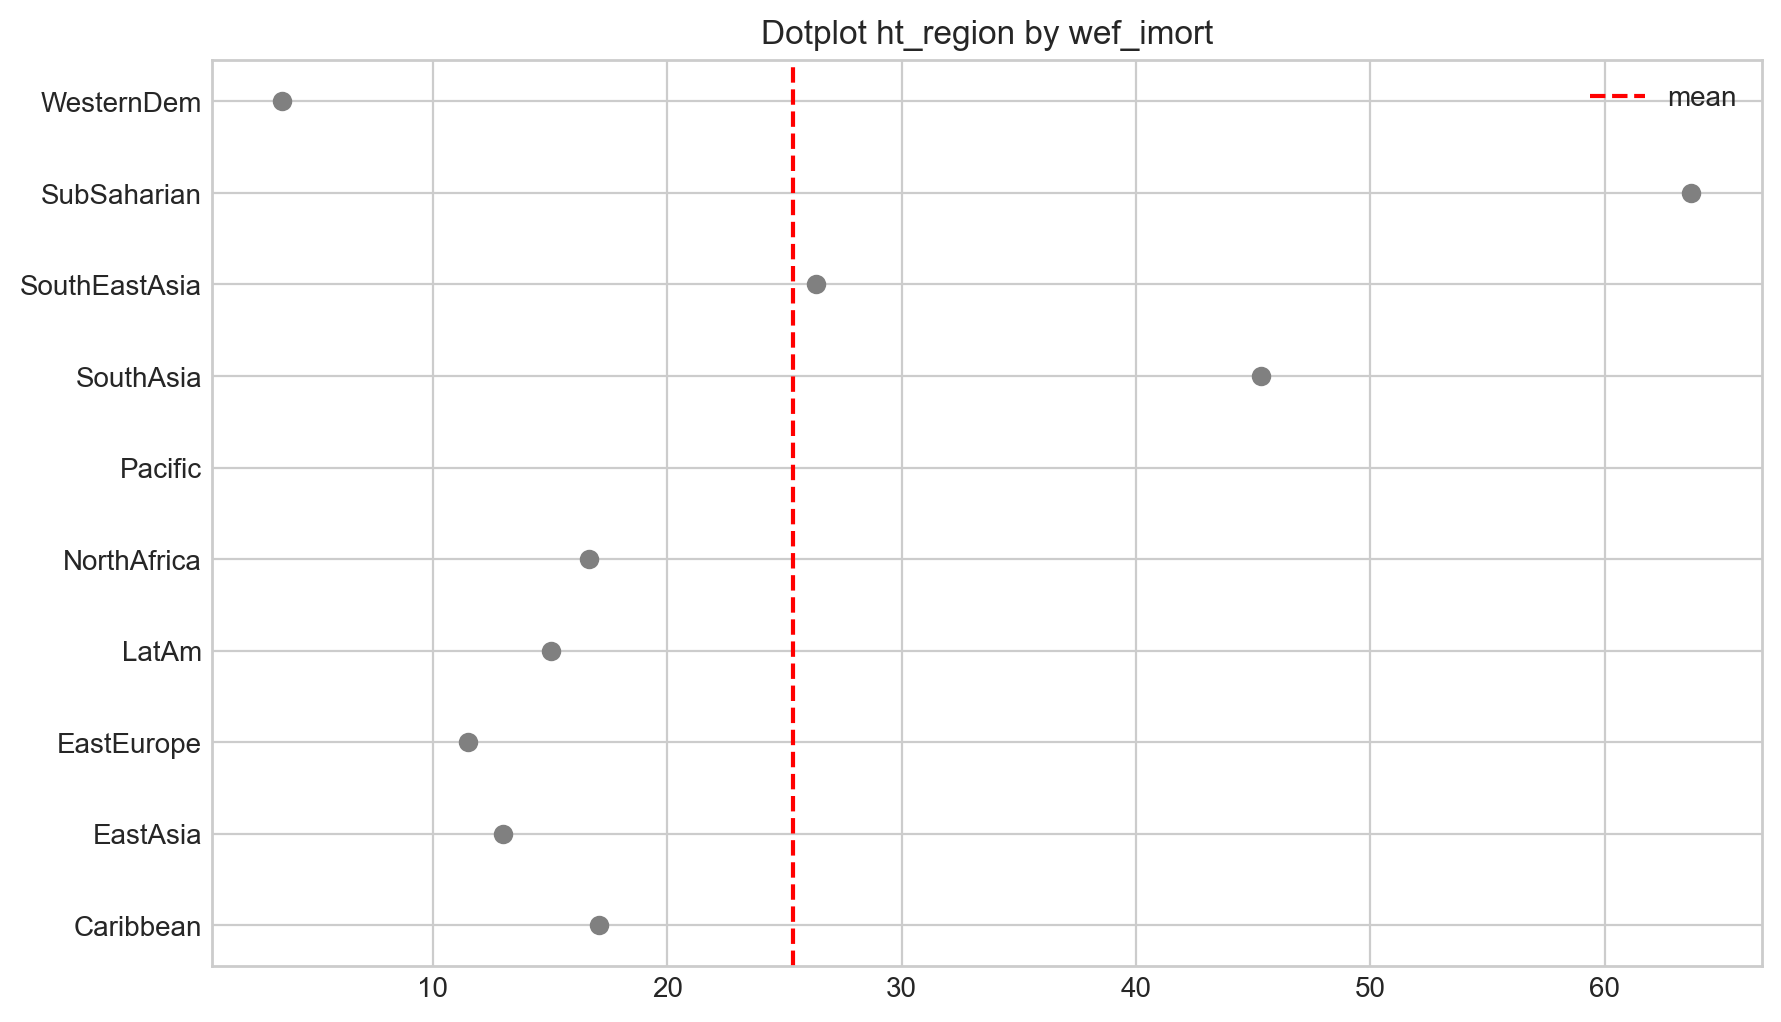

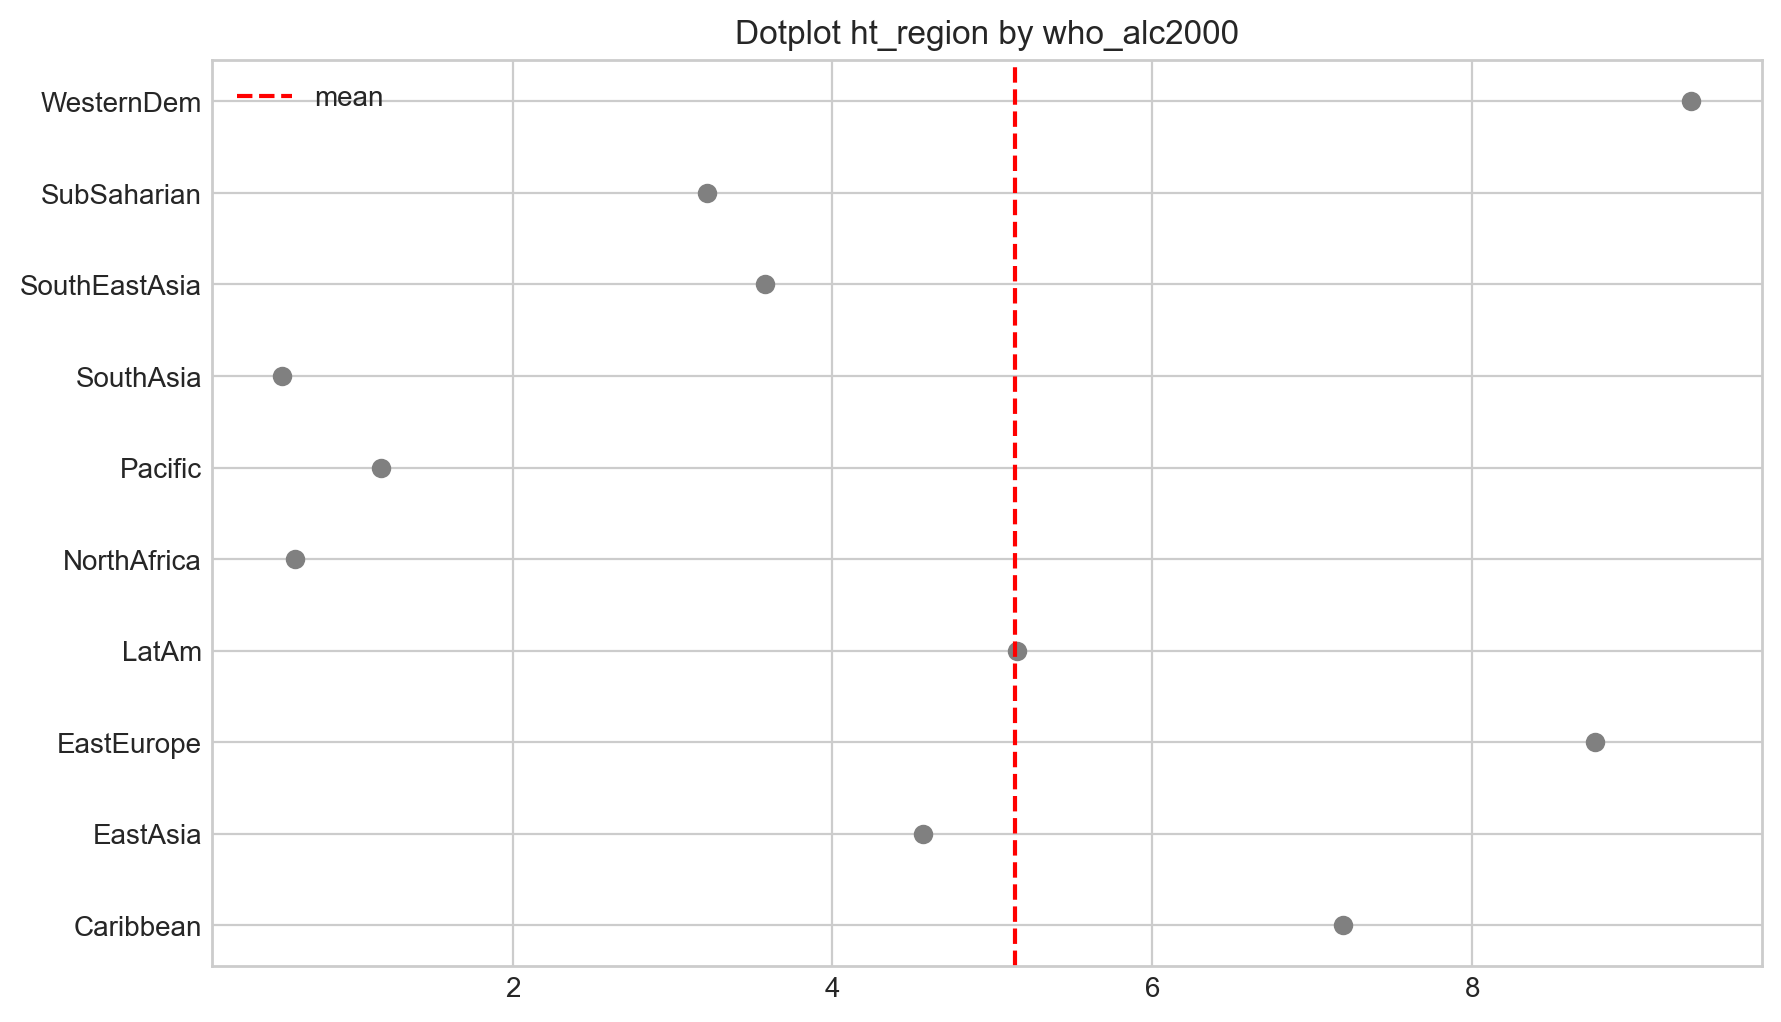

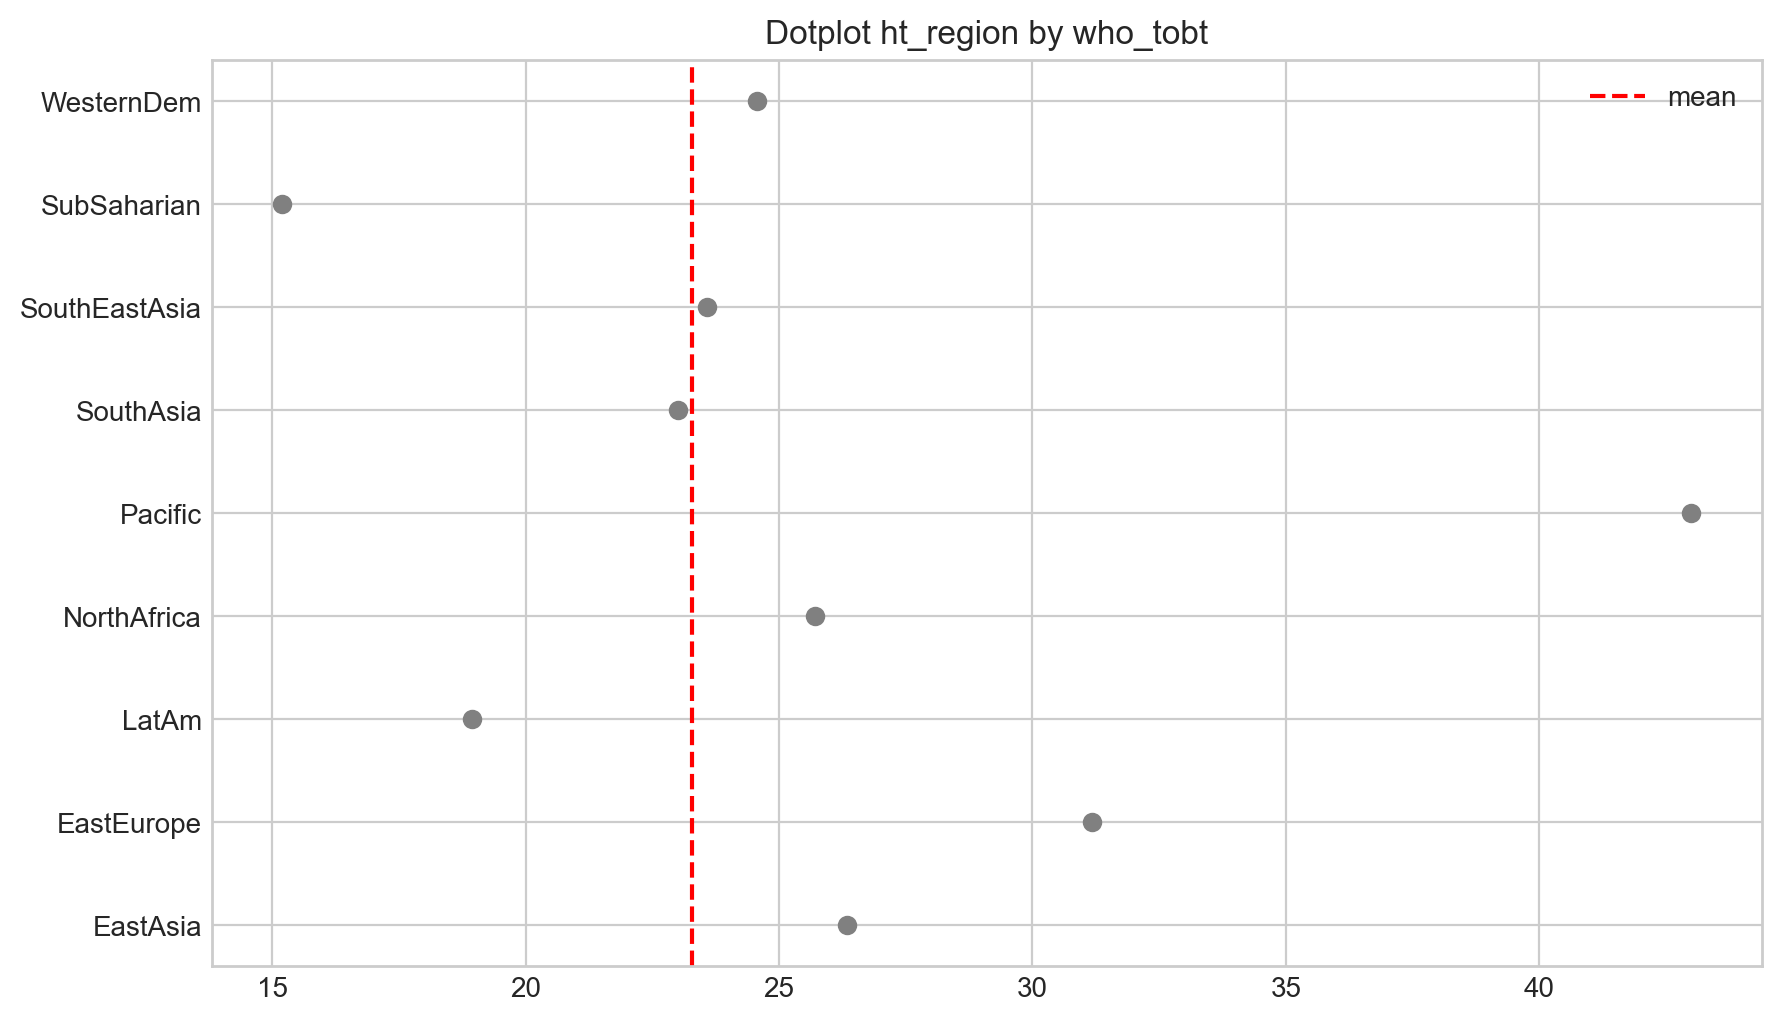

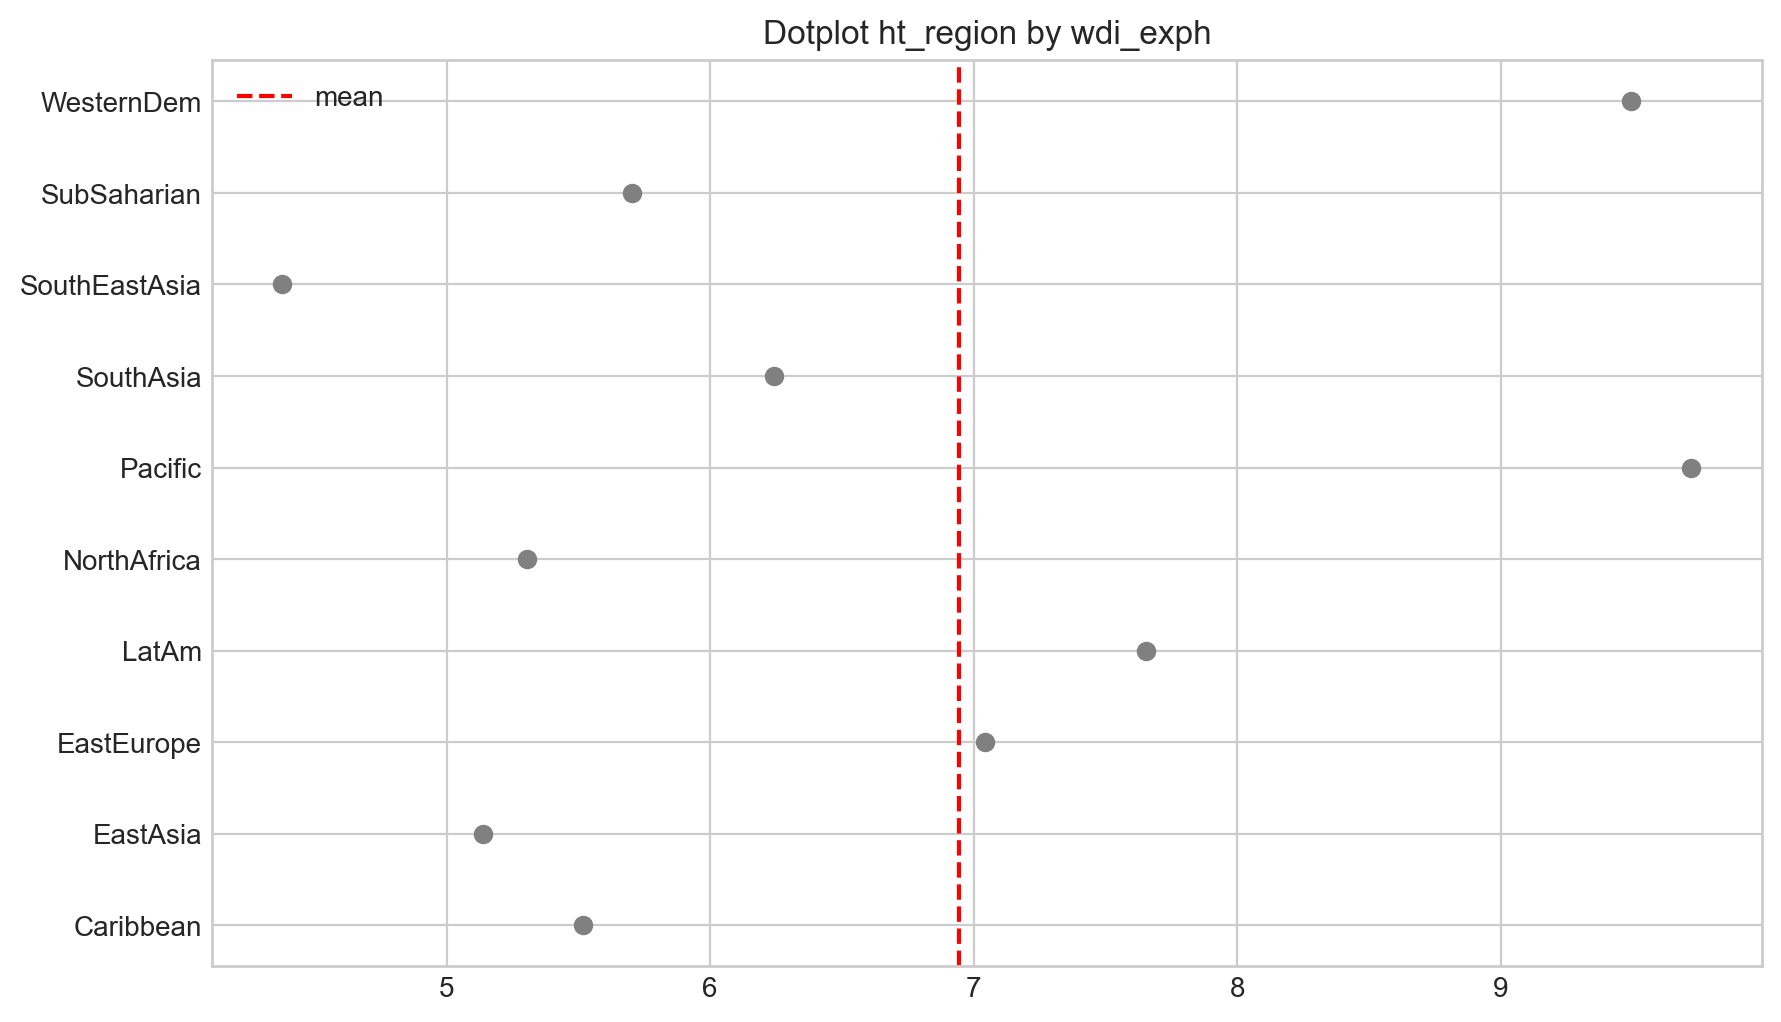

In [11]:
for c in ['wef_imort','who_alc2000','who_tobt','wdi_exph']:
    dot_plot(df_frac, plot_var=c)

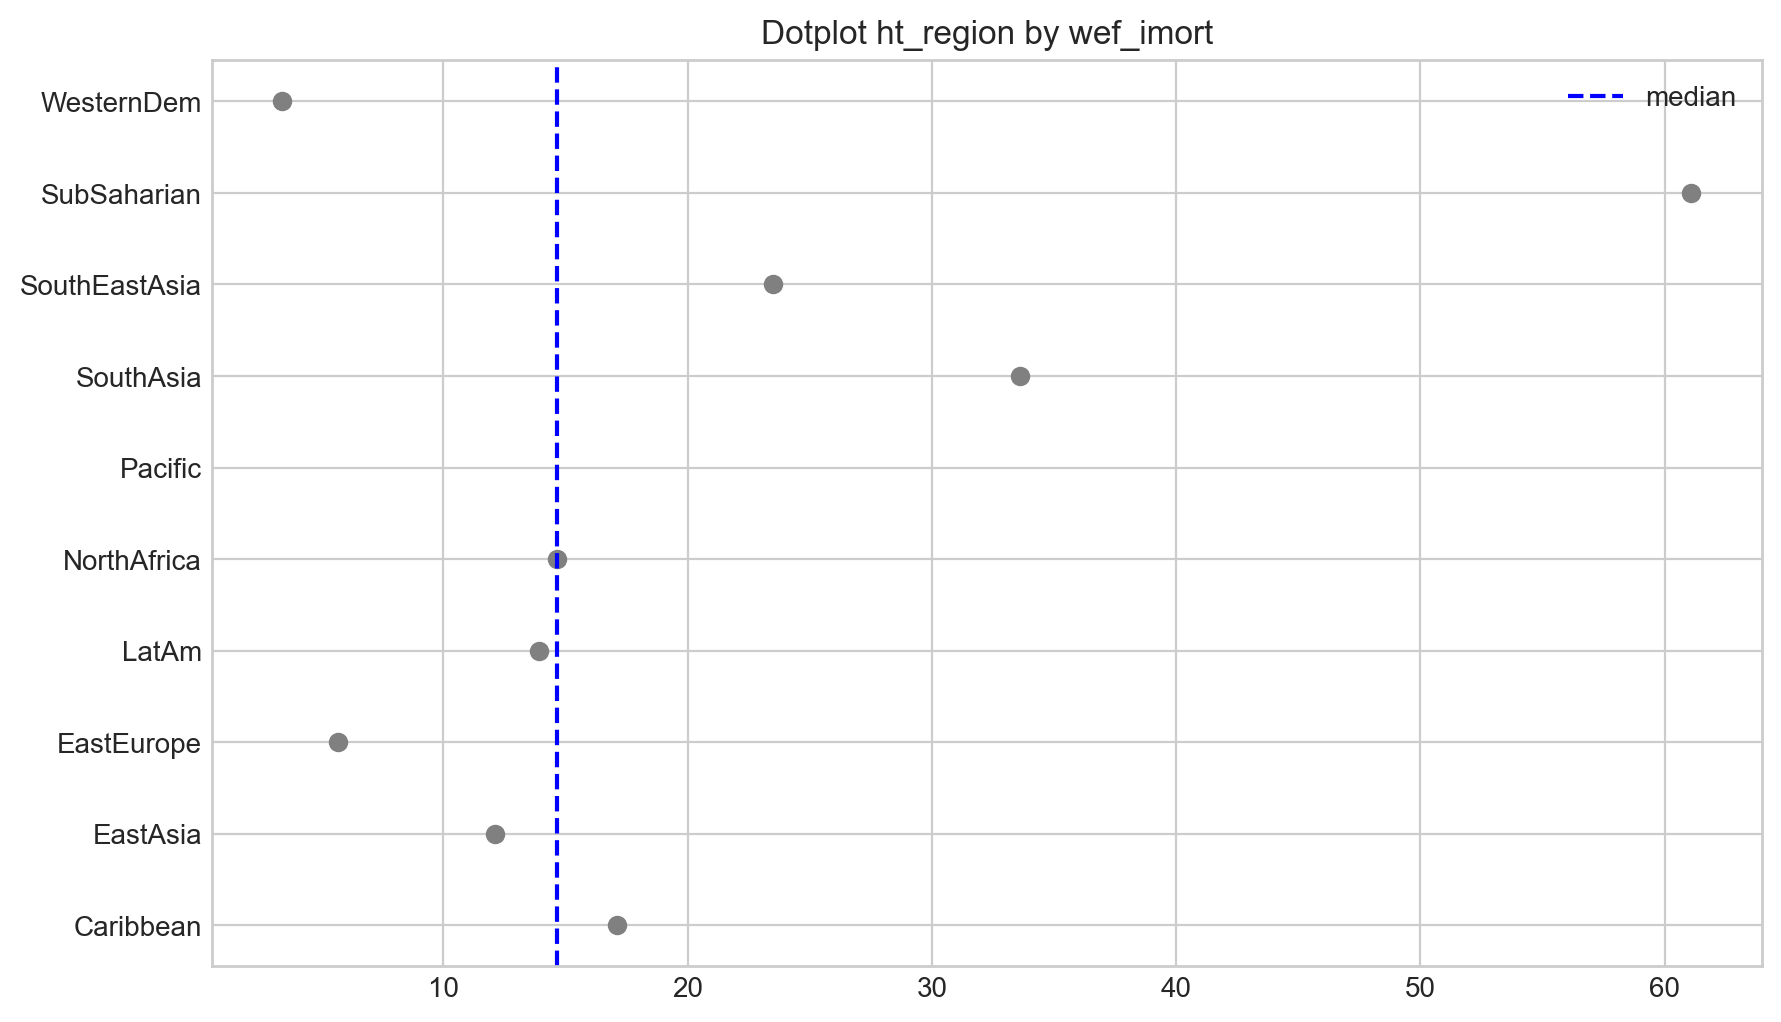

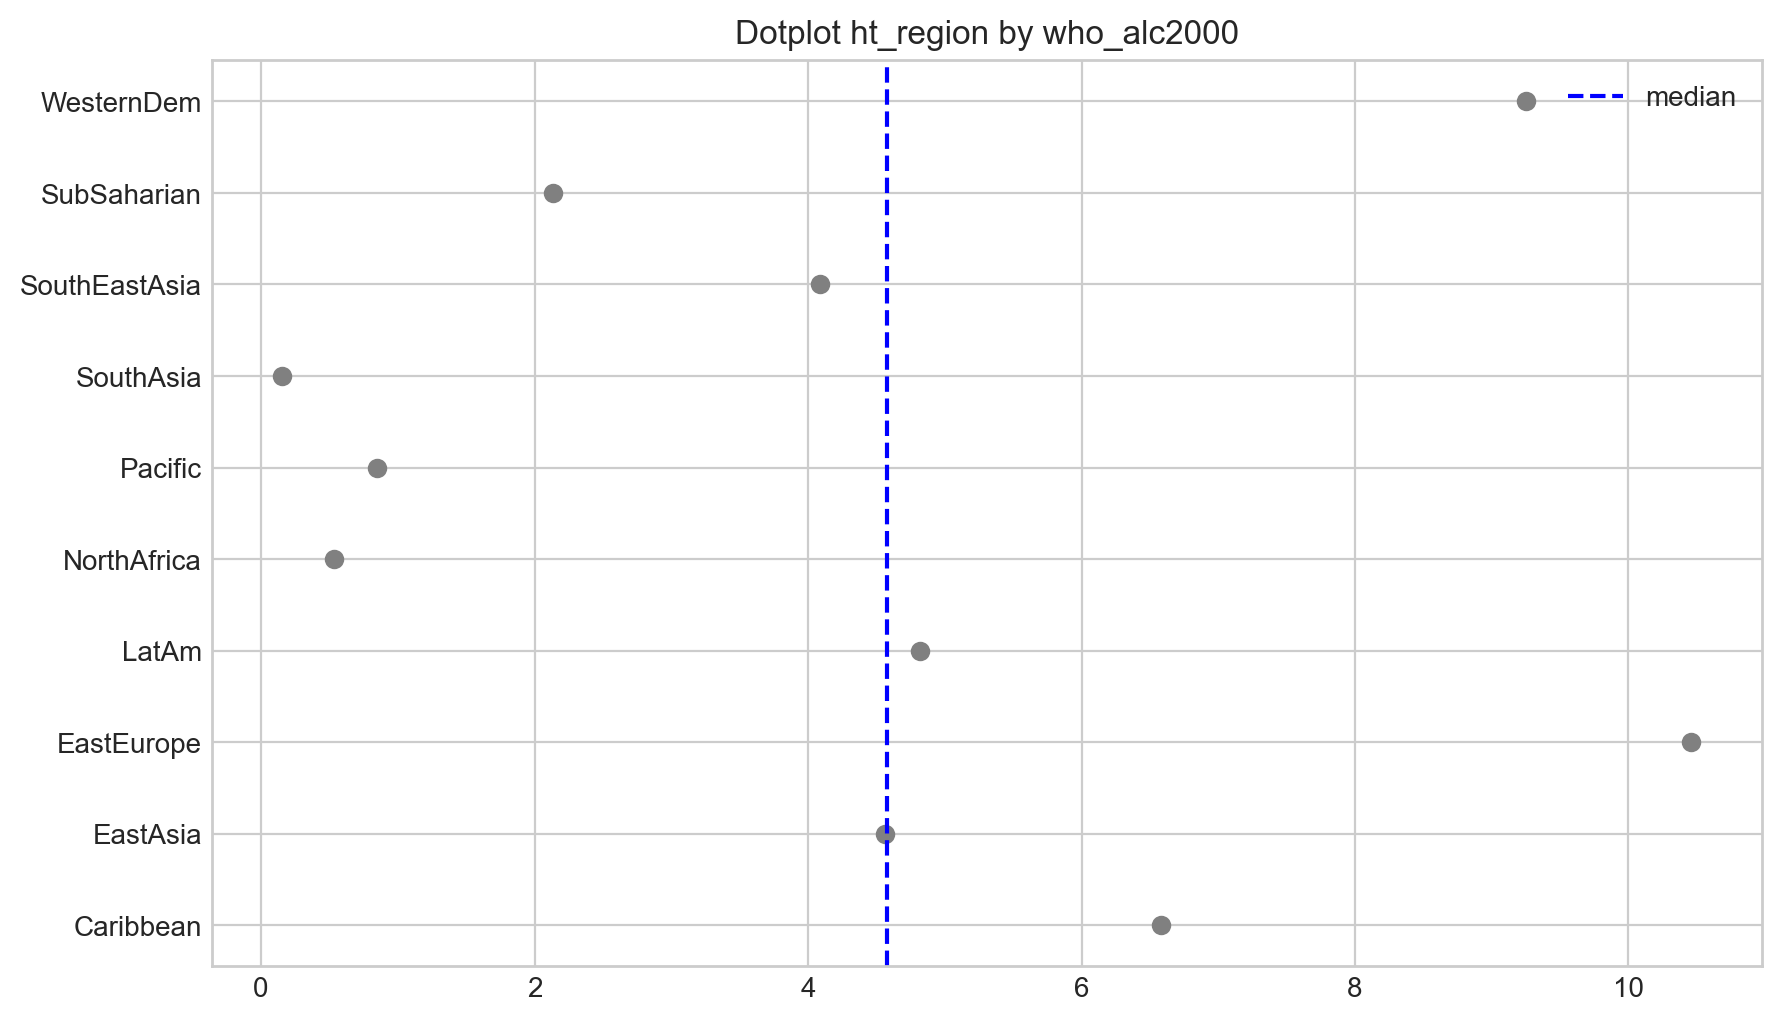

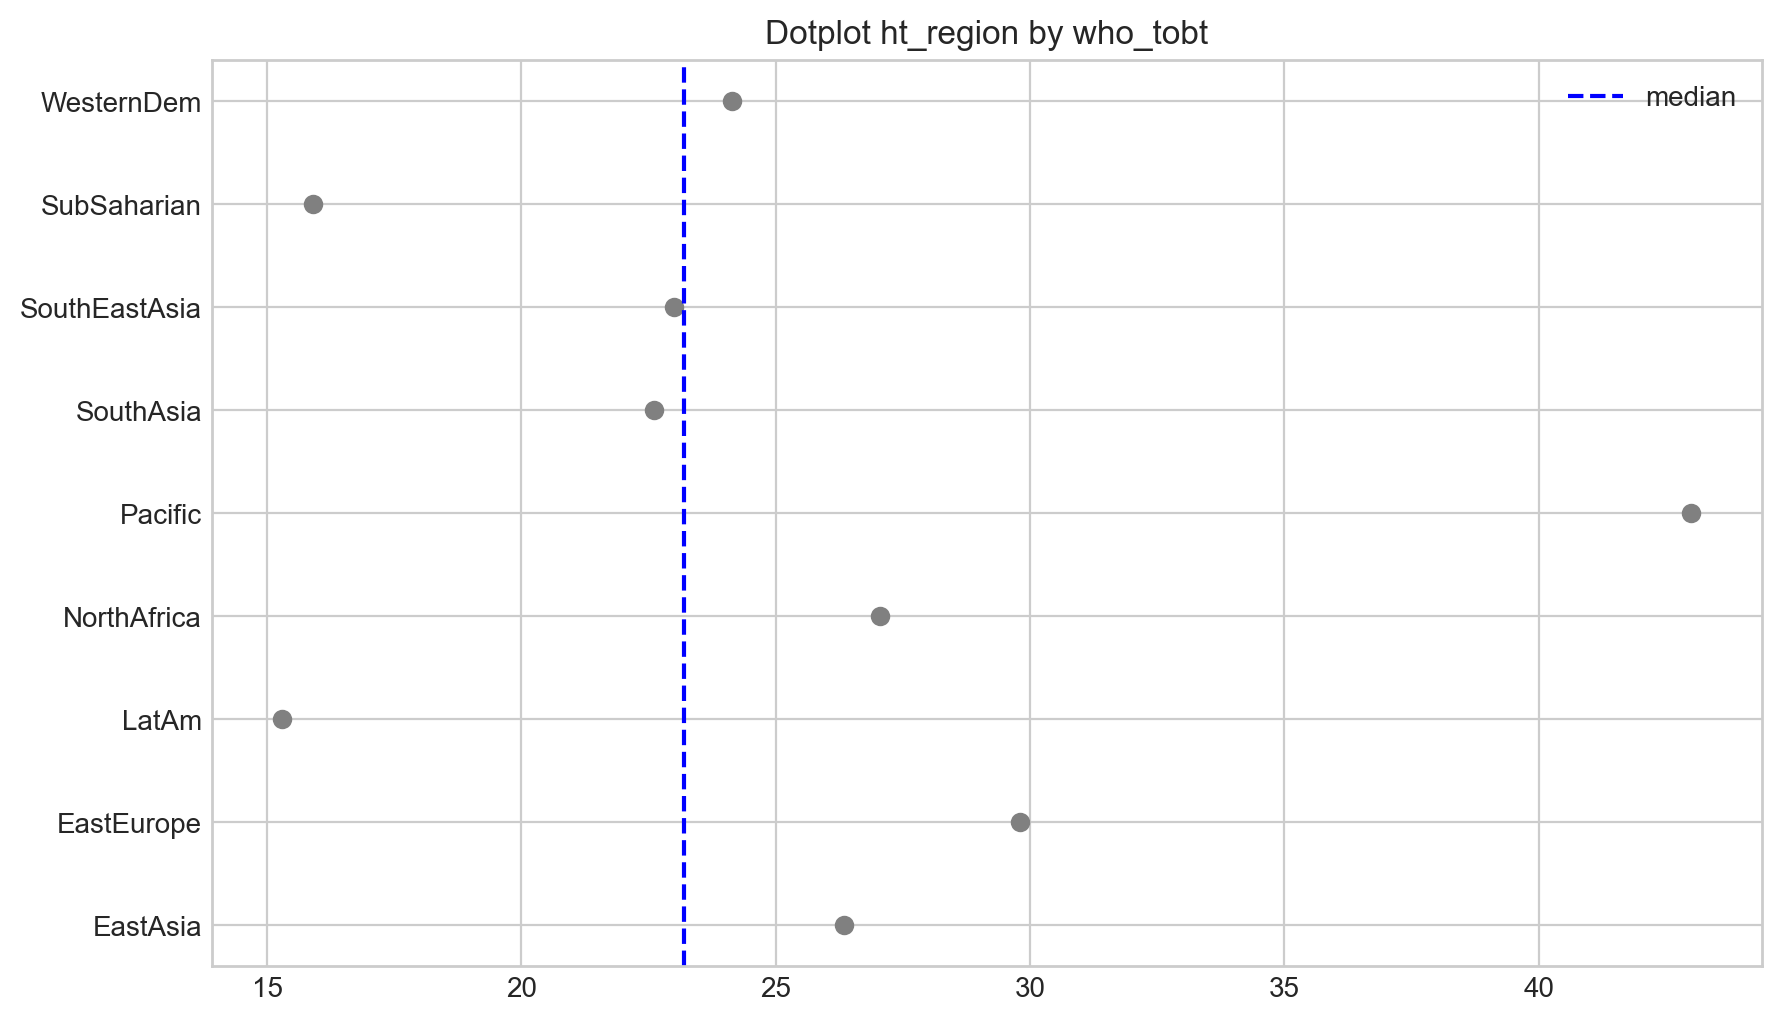

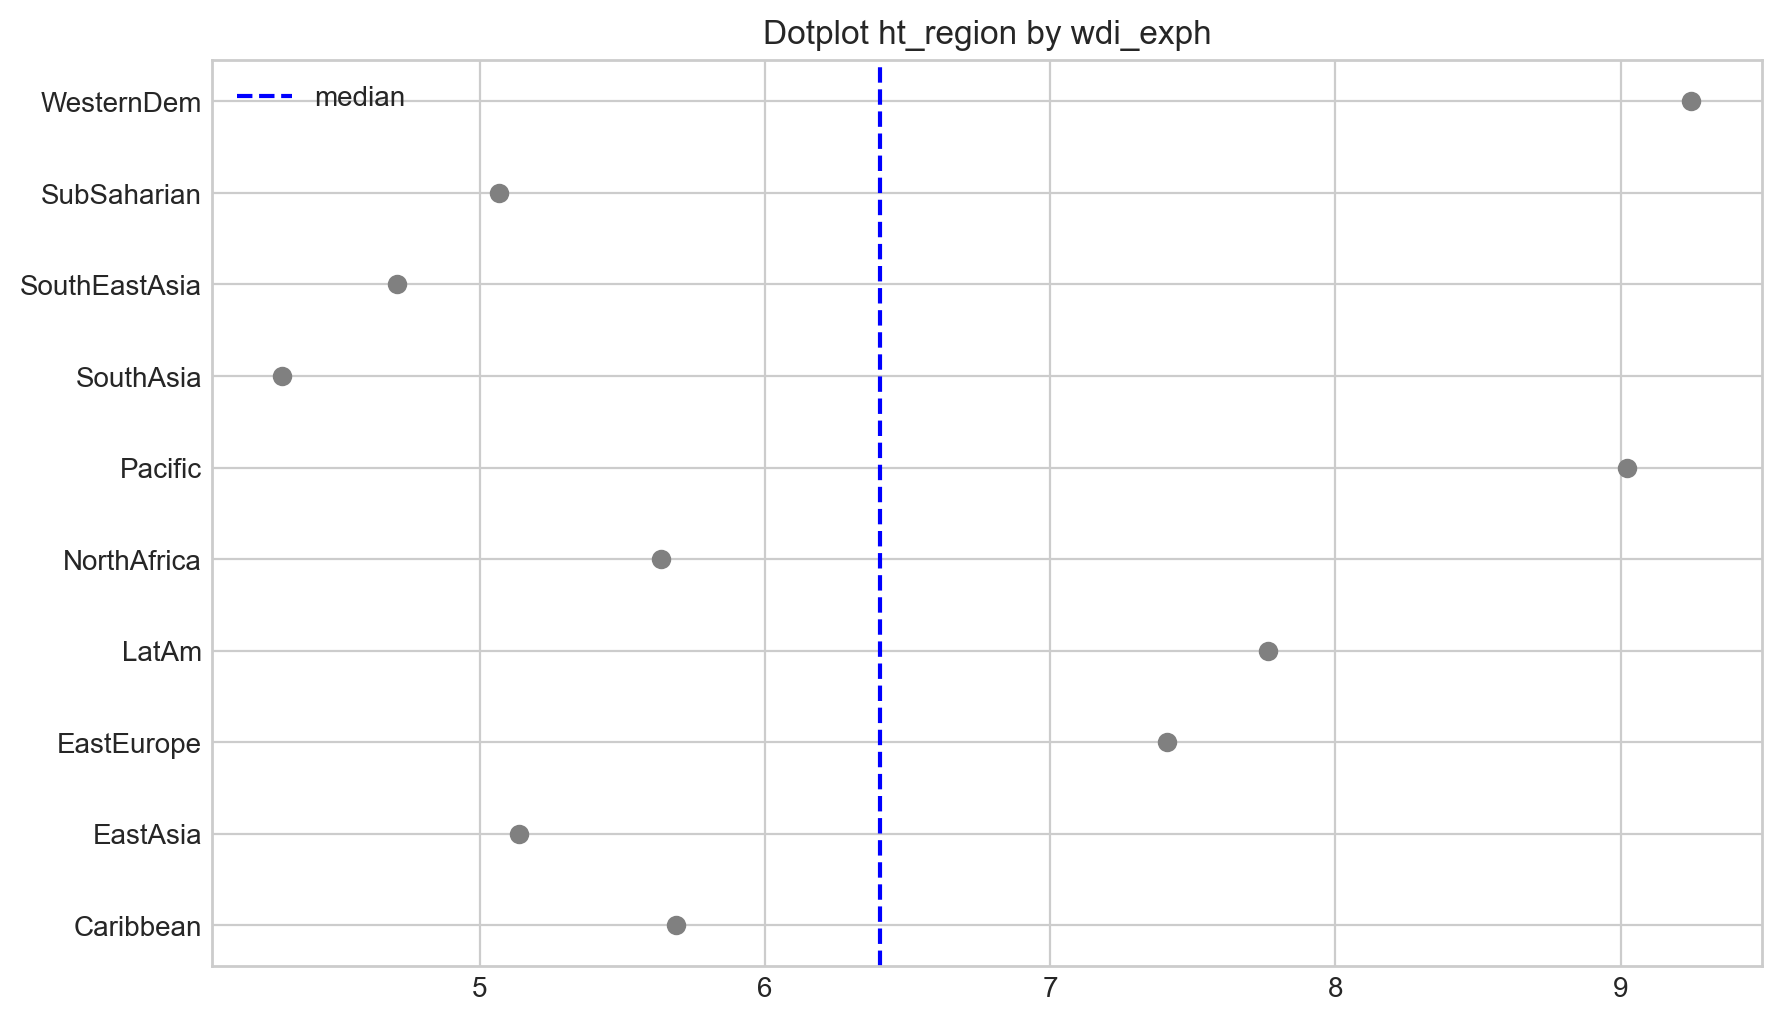

In [20]:
for c in ['wef_imort','who_alc2000','who_tobt','wdi_exph']:
    dot_plot(df_frac, plot_var=c, statistic='median')

#### **`Desafio 6 : Guardar base de datos`**

##### **Forma 1**

In [41]:
filename = 'subsample_AATPL_demo.csv'
ruta = '/github/desafio_latam_data_science/2-Fundamentos_de_Data_Science/Modulo_3_Variables_aleatorias_y_graficos/desafios/'
ruta

'/github/desafio_latam_data_science/2-Fundamentos_de_Data_Science/Modulo_3_Variables_aleatorias_y_graficos/desafios/'

In [42]:
df_frac.to_csv(ruta+filename)

In [54]:
import os
os.listdir()

['01_Desafio_guiado_-_Graficos.ipynb',
 '01_Desafio_guiado_-_Graficos.pdf',
 '02_Desafío_evaluado_-_Estimando_curvas_de_densidad_de_probabilidad.pdf',
 'calidad_datos.py',
 'qog_std_cs_jan18.csv',
 'subsample_AATPL_demo.csv']